# 情報システム工学演習I

## 例題 ex01
- 例題1. データの可視化と分析
- 例題2. 時系列データ予測



### 例題1.  データの可視化と分析

#### (1-1) データのインポート

- AirPassengers (飛行機乗客数）を使用。
- data_AirPassengers.csvをアップロードしてから以下を実行。

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd # pandas のimport
fn='./google_trends_pants.csv' # ファイル名を指定
# fn='https://www.dm.sanken.osaka-u.ac.jp/~yasuko/EX/data_AirPassengers.csv' # URLから直接ダウンロードする場合
index_col = 'Week' # インデックスを指定
df = pd.read_csv(fn, index_col=index_col, parse_dates=True)
df.head() # 可視化 (table)


,pants
Week,
2020-04-19,53
2020-04-26,60
2020-05-03,61
2020-05-10,70
2020-05-17,74


#### (1-2) データの可視化

<Axes: xlabel='Week'>

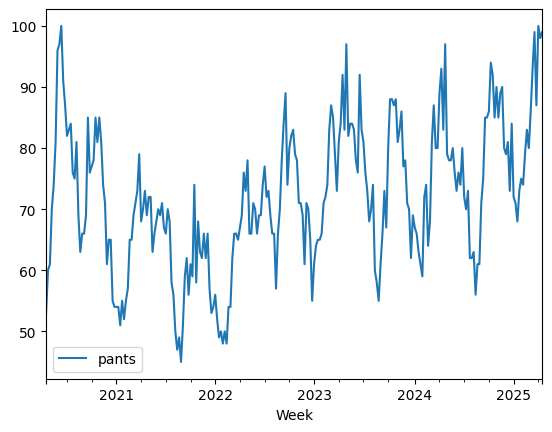

In [ ]:
df.plot() #可視化 (figure)

#### (1-3) データの分析

データについて分析してみる
- 右肩上がりの傾向 (long-term growing trend)
- 周期性あり（yearly periodicity)


### 例題2. 時系列モデルを使った将来予測

#### (2-1) 時系列モデル (AutoRegressive model) を用いた将来予測

- 時系列解析ツールのインポート（色々なツールが存在します。例えば、以下のものを使ってみます。）
- 学習データ、予測データの作成



In [ ]:
# https://www.statsmodels.org/stable/tsa.html
!pip install statsmodels


In [ ]:
# 準備：各種インポート
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.ar_model import AutoReg



Y_org: 262
Y_org: 209
n_a: 0, n_b: 235, n_c: 262


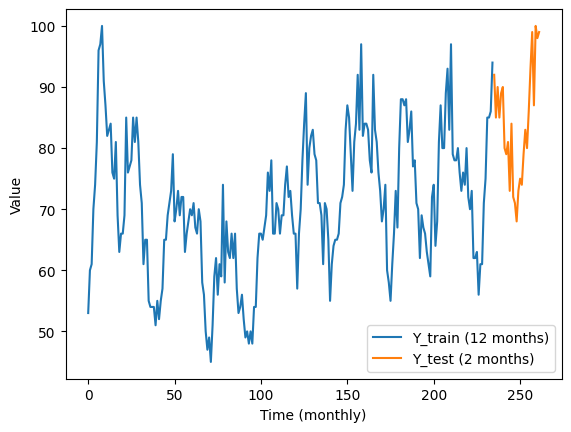

In [ ]:
# 学習データ、予測データの作成
Y_org = df.to_numpy(); print(f'Y_org: {Y_org.shape[0]}')
print(f'Y_org: {int(Y_org.shape[0] * 8 / 10)}')

# 学習幅：10ヶ月、予測幅：2ヶ月
n_a = 0
n_b = int(Y_org.shape[0] * 9 / 10)
n_c = Y_org.shape[0]

print(f'n_a: {n_a}, n_b: {n_b}, n_c: {n_c}')

# 学習データ、テストデータを作る
Y_train = Y_org[n_a:n_b] # train data
Y_test  = Y_org[n_b:n_c] # test data
# オリジナルデータの可視化
plt.figure()
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train (12 months)')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test (2 months)')
plt.xlabel('Time (monthly)'); plt.ylabel('Value')
plt.legend()

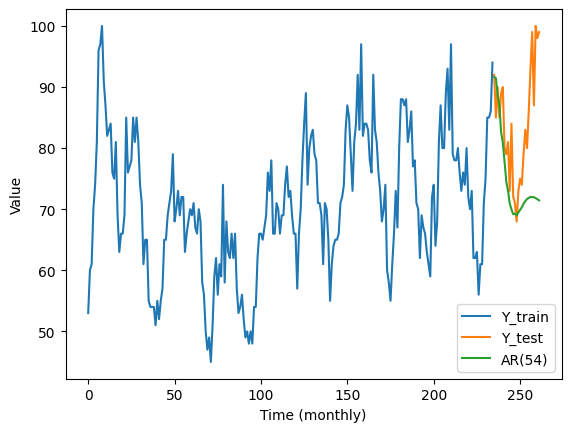

In [ ]:
# AutoRegressive model を用いた時系列モデル学習と将来予測
lag_ar  =  54 # ARのパラメータ数 (lag) を設定, i.e.,  AR(12)
ar      = AutoReg(Y_train, lags = 12)
res     = ar.fit()
Y_pred = ar.predict(res.params, start=n_b, end=n_c-1)
# オリジナルデータと予測結果の可視化
plt.figure()
plt.plot(np.arange(n_a,n_b), Y_train, label='Y_train')
plt.plot(np.arange(n_b,n_c), Y_test,  label='Y_test')
plt.plot(np.arange(n_b,n_c), Y_pred,  label=f'AR({lag_ar})')
plt.xlabel('Time (monthly)'); plt.ylabel('Value')
plt.legend()

#### (2-2) 予測精度の計算 (RMSE, MAE)

In [ ]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
# 予測誤差を計算する関数
def my_accuracy(y_true, y_pred):
  accuracy = {
            "RMSE":   root_mean_squared_error(y_true,  y_pred),
            "MAE":    mean_absolute_error(y_true, y_pred)
            }
  return accuracy
# 予測誤差を表示
print(f'Forecasting error: {my_accuracy(Y_test, Y_pred)}')

Forecasting error: {'RMSE': 13.11427997381247, 'MAE': 9.696023347910565}
